# A dataset about cans of beer.

Data from http://craftcans.com/

## Do your importing and your setup

In [67]:
import pandas as pd
% matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

In [4]:
df= pd.read_csv("craftcans.csv",na_values=["???"])
df.head()

NameError: name 'pd' is not defined

## How many rows do you have in the data? What are the column types?

In [69]:
df.shape

(2416, 7)

In [70]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out breweries

Where does beer come from????

In [71]:
#This gives a more complete list but it's messy
df["Location"].sort_values().unique()

array(['Abingdon, VA', 'Abita Springs, LA', 'Ada, MI', 'Afton, VA',
       'Airway Heights, WA', 'Albuquerque, NM', 'Alpine, TX',
       'Anchorage, AK', 'Angola, IN', 'Ann Arbor, MI', 'Arrington, VA',
       'Arvada, CO', 'Ashburn, VA', 'Asheville, NC', 'Ashland, OR',
       'Ashland, VA', 'Aspen, CO', 'Astoria, OR', 'Athens, GA',
       'Athens, OH', 'Atlanta, GA', 'Atlantic Highlands, NJ', 'Aurora, CO',
       'Aurora, IN', 'Austin, TX', 'Avon, IN', 'Baltimore, MD',
       'Bargersville, IN', 'Baton Rouge, LA', 'Battle Creek, MI',
       'Belfast, ME', 'Bellingham, WA', 'Belmont, CA', 'Belt, MT',
       'Bend, OR', 'Biglerville, PA', 'Birmingham, AL', 'Birmingham, MI',
       'Black Mountain, NC', 'Blanco, TX', 'Bloomfield, CT',
       'Bloomington, IL', 'Bloomington, IN', 'Boise, ID', 'Boone, NC',
       'Boonville, CA', 'Boston, MA', 'Boulder, CO', 'Boynton Beach, FL',
       'Bozeman, MT', 'Brevard, NC', 'Bridgewater Corners, VT',
       'Bridgman, MI', 'Bronx, NY', 'Brooklyn Cen

In [72]:
#This is a nicer list but not all locations are shown
df["Location"].value_counts()

Grand Rapids, MI        66
Chicago, IL             55
Portland, OR            52
Indianapolis, IN        43
San Diego, CA           42
Boulder, CO             41
Denver, CO              40
Brooklyn, NY            38
Seattle, WA             35
Longmont, CO            33
San Francisco, CA       32
Tampa, FL               31
Stevens Point, WI       30
Austin, TX              25
Fort Collins, CO        22
Cincinnati, OH          21
Boston, MA              21
Aurora, IN              20
Eagle, CO               19
Saint Louis, MO         19
Chandler, AZ            19
Missoula, MT            18
Manhattan, KS           18
Boonville, CA           18
Davenport, IA           18
Salt Lake City, UT      17
Boise, ID               17
San Antonio, TX         16
Astoria, OR             16
Minneapolis, MN         16
                        ..
Northamtpon, MA          1
Laurel, MD               1
Libertyville, IL         1
Plant City, FL           1
Ukiah, CA                1
Douglas, MI              1
P

## What are the top 10 producers of cans of beer?

In [73]:
df["Brewery"].value_counts().head(n=10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common size of beer?

The answer won't be pretty - we'll learn to clean it up in a week or two.

In [74]:
df["Size"].value_counts()

12 oz.               1507
16 oz.                814
24 oz.                 21
16 oz. Alumi-Tek®      15
19.2 oz.               14
12 oz                  14
16 oz                  12
32 oz.                  5
24 oz. "Silo Can"       1
12 & 16 oz.             1
19.2                    1
12 ounce                1
16.9 oz.                1
12 oz. Slimline         1
8.4 oz.                 1
12 OZ.                  1
Name: Size, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [75]:
df["ABV"].value_counts()
#The most common ABV is 5.00%

5.00%     215
5.50%     158
6.00%     125
6.50%     123
5.20%     107
7.00%      92
4.50%      89
4.80%      72
5.60%      66
5.80%      66
5.10%      62
5.30%      60
6.20%      59
4.90%      59
4.70%      57
8.00%      57
6.80%      52
5.70%      52
5.40%      50
7.50%      43
4.00%      38
6.30%      38
4.20%      38
7.20%      37
9.90%      35
5.90%      34
6.90%      32
4.60%      32
8.50%      26
6.70%      25
         ... 
4.10%       9
9.50%       9
7.40%       8
8.30%       8
7.90%       7
8.80%       6
3.80%       6
3.50%       6
7.60%       5
9.60%       5
9.70%       5
9.30%       5
3.70%       4
8.60%       4
8.10%       4
9.10%       3
9.80%       3
8.40%       3
3.20%       3
2.70%       2
8.90%       2
12.80%      1
10.00%      1
2.80%       1
10.40%      1
0.10%       1
12.50%      1
3.40%       1
9.40%       1
12.00%      1
Name: ABV, Length: 74, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take three steps:

1. List just the ABV of every row
2. Remove the % symbol
3. Convert it to a `float`
4. Save it into a new column. Or the same column, if you're feeling wild.

Although it *also* turns out that there's some bad data in there. We'll need to clean that up, too.

In [76]:
#Step 1 List just the ABV of every row
df["ABV"]

0        4.50%
1        4.90%
2        4.80%
3        6.00%
4        6.00%
5        5.60%
6        8.00%
7       12.50%
8        7.70%
9        4.20%
10       5.00%
11       6.60%
12       4.00%
13       5.50%
14       7.60%
15       5.10%
16       6.50%
17       6.00%
18       5.00%
19       5.20%
20       4.80%
21       7.20%
22       6.70%
23       4.90%
24       8.00%
25       7.50%
26       6.00%
27       8.00%
28       6.30%
29       5.80%
         ...  
2386     5.70%
2387     6.20%
2388     4.90%
2389     9.90%
2390     6.20%
2391     5.80%
2392     5.20%
2393     8.50%
2394     7.00%
2395     5.30%
2396     5.60%
2397     4.90%
2398     5.10%
2399     4.00%
2400     5.50%
2401     5.10%
2402     5.10%
2403     9.70%
2404     5.10%
2405     6.70%
2406     6.20%
2407     8.30%
2408     7.00%
2409     4.90%
2410     9.90%
2411     5.30%
2412     9.90%
2413     8.00%
2414     8.70%
2415     6.50%
Name: ABV, Length: 2416, dtype: object

In [77]:
#Step 2 Remove the % symbol
df["ABV"] = df["ABV"].str.replace("%"," ")
df["ABV"]

0        4.50 
1        4.90 
2        4.80 
3        6.00 
4        6.00 
5        5.60 
6        8.00 
7       12.50 
8        7.70 
9        4.20 
10       5.00 
11       6.60 
12       4.00 
13       5.50 
14       7.60 
15       5.10 
16       6.50 
17       6.00 
18       5.00 
19       5.20 
20       4.80 
21       7.20 
22       6.70 
23       4.90 
24       8.00 
25       7.50 
26       6.00 
27       8.00 
28       6.30 
29       5.80 
         ...  
2386     5.70 
2387     6.20 
2388     4.90 
2389     9.90 
2390     6.20 
2391     5.80 
2392     5.20 
2393     8.50 
2394     7.00 
2395     5.30 
2396     5.60 
2397     4.90 
2398     5.10 
2399     4.00 
2400     5.50 
2401     5.10 
2402     5.10 
2403     9.70 
2404     5.10 
2405     6.70 
2406     6.20 
2407     8.30 
2408     7.00 
2409     4.90 
2410     9.90 
2411     5.30 
2412     9.90 
2413     8.00 
2414     8.70 
2415     6.50 
Name: ABV, Length: 2416, dtype: object

In [78]:
# Step 3 Convert it to a float
df["ABV"] = df["ABV"].astype(float)

In [79]:
# Step 4 Save it into a new column
df["ABVfloatagain"] = df["ABV"]

In [108]:
df["ABVfloatagain"].fillna("Unknown,inplace = True").value_counts()

5.0                       215
5.5                       158
6.0                       125
6.5                       123
5.2                       107
7.0                        92
4.5                        89
4.8                        72
Unknown,inplace = True     68
5.8                        66
5.6                        66
5.1                        62
5.3                        60
4.9                        59
6.2                        59
4.7                        57
8.0                        57
5.7                        52
6.8                        52
5.4                        50
7.5                        43
4.2                        38
6.3                        38
4.0                        38
7.2                        37
9.9                        35
5.9                        34
4.6                        32
6.9                        32
8.5                        26
                         ... 
9.5                         9
4.1                         9
7.4       

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [82]:
df.head(n=3)

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABVfloatagain
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0,4.5
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0,4.9
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,4.8


In [116]:
#The top 10 cities for canned craft beer are:
df['Location'].value_counts(normalize=True).head(n=10)

Grand Rapids, MI    0.027386
Chicago, IL         0.022822
Portland, OR        0.021577
Indianapolis, IN    0.017842
San Diego, CA       0.017427
Boulder, CO         0.017012
Denver, CO          0.016598
Brooklyn, NY        0.015768
Seattle, WA         0.014523
Longmont, CO        0.013693
Name: Location, dtype: float64

## List all of the beer from Brooklyn, NY

In [127]:
brooklyn = df[df["Location"] == "Brooklyn, NY"]
brooklyn["Beer"].value_counts()

East India Pale Ale                2
Hi-Res                             1
Sweet Action (2011)                1
The Crisp                          1
Abigale                            1
Brooklyn Lager (16 oz.)            1
Hipster Ale (Two Roads Brewing)    1
Molotov Lite                       1
Righteous Ale (2011)               1
Sweet Action                       1
Sensi Harvest                      1
Resin                              1
Brownstone                         1
KelSo Nut Brown Lager              1
KelSo Pilsner                      1
3Beans                             1
Brooklyn Summer Ale (2011)         1
Autumnation (2013)                 1
Apollo                             1
Bengali                            1
4Beans                             1
Bengali Tiger (2011)               1
KelSo India Pale Ale               1
Autumnation (2011-12) (2011)       1
Hipster Ale (Westbrook Brewing)    1
Brooklyn Summer Ale                1
Global Warmer                      1
J

## What brewery in Brooklyn puts out the most cans of beer?

In [145]:
brooklyn["Brewery"].value_counts().head(n=1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [150]:
brooklyn.groupby("Brewery")['Beer'].value_counts().groupby(level=0).nlargest(n=5)

Brewery              Brewery              Beer                           
Brooklyn Brewery     Brooklyn Brewery     East India Pale Ale                2
                                          Brooklyn Lager (12 oz.)            1
                                          Brooklyn Lager (16 oz.)            1
                                          Brooklyn Summer Ale                1
                                          Brooklyn Summer Ale (2011)         1
Evil Twin Brewing    Evil Twin Brewing    Bikini Beer                        1
                                          Hipster Ale (Two Roads Brewing)    1
                                          Hipster Ale (Westbrook Brewing)    1
                                          Molotov Lite                       1
                                          Nomader Weiss                      1
KelSo Beer Company   KelSo Beer Company   KelSo India Pale Ale               1
                                          KelSo Nut Brown

## List all of the breweries in New York state. Then count them.

In [87]:
NY = df[df["Location"].str.contains("NY", na=False)]
NY["Brewery"].value_counts()

Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Blue Point Brewing Company        4
Butternuts Beer and Ale           4
KelSo Beer Company                3
The Bronx Brewery                 3
Montauk Brewing Company           2
Chatham Brewing                   2
Bomb Beer Company                 2
Upstate Brewing Company           2
The Manhattan Brewing Company     1
Southampton Publick House         1
Newburgh Brewing Company          1
Dundee Brewing Company            1
Name: Brewery, dtype: int64

# Measuring International Bitterness Units

IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## What is the average IBU measurement across all beers?

In [88]:
df["IBUs"].mean()

42.713167259786474

## Draw the distribution of IBU measurements, but with *thirty* bins instead of the default of 10

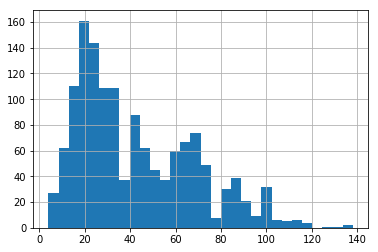

In [89]:
df['IBUs'].hist (bins = 30)

## List all of the beers with IBUs above the 75th percentile

In [90]:
#Step 1 Find the 75th and 25th percentiles
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [91]:
#Step 2 List the beers with IBUs above the 75th percentile
df[df['IBUs'] > 64]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABVfloatagain
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,8.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0,12.5
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,7.6
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,6.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0,7.2
22,Hoponius Union,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,12 oz.,6.7,65.0,6.7
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0,8.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0,7.5
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0,8.0
46,Yeti Imperial Stout,Great Divide Brewing Company,"Denver, CO",Russian Imperial Stout,12 oz.,9.5,75.0,9.5


## List all of the beers with IBUs below the 25th percentile

In [92]:
#Step 3 List the beers with IBUs below 25th percentile
df[df["IBUs"]< 21]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABVfloatagain
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,4.8
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0,4.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0,5.5
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0,5.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0,5.2
20,Leisure Time,Jack's Abby Craft Lagers,"Framingham, MA",American Pale Lager,12 oz.,4.8,15.0,4.8
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0,4.7
31,Westfalia,Fort Point Beer Company,"San Francisco, CA",American Amber / Red Ale,12 oz.,5.6,16.0,5.6
32,KSA,Fort Point Beer Company,"San Francisco, CA",Kölsch,12 oz.,4.6,17.0,4.6
54,Sparkle,Petoskey Brewing,"Petoskey, MI",American Pale Lager,16 oz.,4.1,12.0,4.1


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the nan ones at the bottom. I want a nice graph, too - don't let them all be squished together, either!

In [93]:
#Step 1 find the median IBUs for each type of beer
medIBUs = df.groupby("Style")["IBUs"].median()
medIBUs

Style
Abbey Single Ale                      22.0
Altbier                               36.5
American Adjunct Lager                 9.0
American Amber / Red Ale              31.0
American Amber / Red Lager            23.0
American Barleywine                   96.0
American Black Ale                    73.0
American Blonde Ale                   20.0
American Brown Ale                    26.0
American Dark Wheat Ale               25.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Double / Imperial Stout      51.0
American IPA                          69.0
American India Pale Lager             65.0
American Malt Liquor                   NaN
American Pale Ale (APA)               44.0
American Pale Lager                   18.5
American Pale Wheat Ale               20.0
American Pilsner                      21.5
American Porter                       31.0
American Stout                        40.0
American Strong Ale                   70.0
Ameri

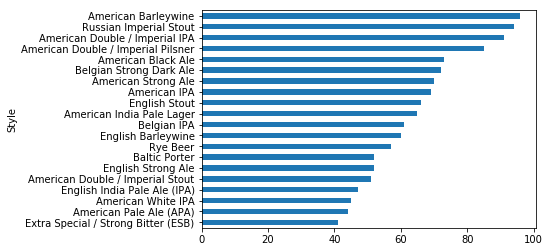

In [111]:
#Step 2 plot the median IBUs for each beer type
medIBUs.dropna().sort_values().tail(n=20).plot(kind= "barh")

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

You'll want to think about it in three pieces - finding the high IBU beers, then finding out what the most common styles are, then getting the top 5.

In [112]:
#high IBU beers = IBUs higher than 75th percentile (IBU>64)
#low IBU beers = IBUs lower than 25th percentile (IBU<21)
#Step 1 Find the high IBU beers and create a new data frame for this
highIBU = df[df["IBUs"] > 64]
highIBU.head(n=3)

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABVfloatagain
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,8.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0,12.5
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,7.6


In [96]:
#Step 2 then find out what the most common styles are and get top 5
highIBU["Style"].value_counts().head(n=5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles (also draw a histogram)

I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

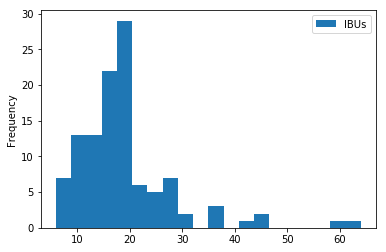

In [152]:
df[df["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].plot(x='Style', y='IBUs', kind='hist', bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

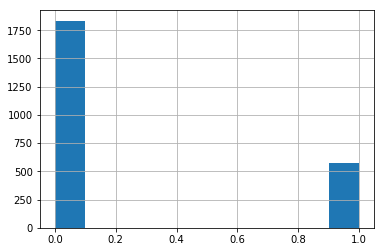

In [98]:
df["Style"].str.contains("IPA").dropna().hist()

## Plot those two histograms on top of one another

In [173]:
wheat = df[df["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]

In [174]:
ipa = df[df["Style"].str.contains("IPA").notnull()]

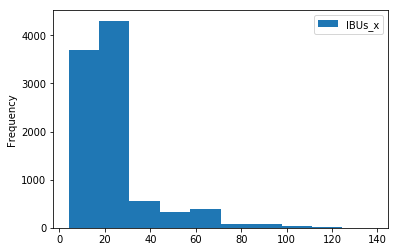

In [176]:
df.merge(wheat,left_on='Style',right_on='Style',how='outer').plot(x='Style',y='IBUs_x', kind='hist')

## Compare the ABV of wheat beers vs. IPAs 

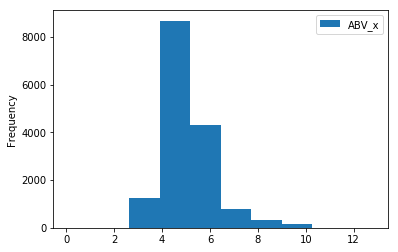

In [179]:
df.merge(wheat,left_on='Style',right_on='Style',how='outer').plot(x='Style',y='ABV_x', kind='hist')